In [1]:
%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
data = input_data.read_data_sets("data/MNIST",one_hot = True)
print("size of:")
print("-Traning-set:\t\t{}".format(len(data.train.labels)))
print("-Test-set:\t\t{}".format(len(data.test.labels)))
print("-Validation-set:\t{}".format(len(data.validation.labels)))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
size of:
-Traning-set:		55000
-Test-set:		10000
-Validation-set:	5000


In [4]:
data.test.labels[0:5,:]
data.test.cls = np.array([label.argmax() for label in data.test.labels])

data.test.cls

array([7, 2, 1, ..., 4, 5, 6])

In [5]:
#we know thw MNIST image are 28 pixel in each dimension
image_size = 28

#image are store in one-dimension arrays of this length
image_size_flat = image_size * image_size

#Tuple with hight and width of image used to reshape array
image_shape = (image_size,image_size)

#number of classes, one class for each of 10 digits
num_classes = 10


In [6]:

#3x3 MNIST image view

def plot_images(image,cls_true,cls_pred = None):
    assert len(image) == len(cls_true) == 9

    #create figure with 3x3 sub-plots
    fig,axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3,wspace=0.3)

    for i,ax in enumerate(axes.flat):
        #plot image
        ax.imshow(image[i].reshape(image_shape),cmap='binary')

        #show the true predection classes
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0},pred: {1}".format(cls_true[i],cls_pred[i])

        ax.set_xlabel(xlabel)

        #remove tricks from plot
        ax.set_xticks([])
        ax.set_yticks([])



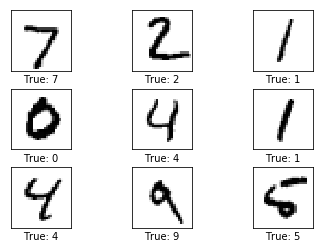

In [7]:

#get the first image from the test-set
images = data.test.images[0:9]

#get the true classes for those images
cls_true = data.test.cls[0:9]

#ploat he images and labels using our helper-function above
plot_images(image=images,cls_true=cls_true)

In [8]:
x = tf.placeholder(tf.float32,[None,image_size_flat])

In [9]:
y_true = tf.placeholder(tf.float32,[None,num_classes])

In [10]:
y_true_cls = tf.placeholder(tf.int64,[None])

In [11]:
weights = tf.Variable(tf.zeros([image_size_flat,num_classes]))

In [12]:
biases = tf.Variable(tf.zeros(num_classes))

In [13]:
logits = tf.matmul(x,weights) + biases

In [14]:
y_pred = tf.nn.softmax(logits)

In [15]:
y_pred_cls = tf.argmax(y_pred,dimension=1)

Instructions for updating:
Use the `axis` argument instead


In [16]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [17]:
cost = tf.reduce_mean(cross_entropy)

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [19]:
correct_prediction = tf.equal(y_pred_cls,y_true_cls)

In [20]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [21]:
session = tf.Session()

In [22]:
session.run(tf.global_variables_initializer())

In [23]:
batch_size = 100

In [24]:
def optimize(num_iterations):
    for i in range(num_iterations):
        #get a batch of tarning examples
        #x_batch now holds a batch of images and 
        #y_true_batch are the true labels for those image
        x_batch,y_true_batch = data.train.next_batch(batch_size)
        #PUT THE BATCH INTO A DIC WITH THE PROPER NAMES
        #FOR PLACEHOLDER variables in the Tensorflow graph.
        #Note that the placeholder for y_true_cls is not set
        #because it is not used during tranig
        
        feed_dict_train = {x:x_batch, y_true:y_true_batch}
        
        #run the optimizer using this batch of raning data
        #Tensorflow assigns the variables in feed_dic_train
        #to the placeholder variables and then runs the optimizer
        session.run(optimizer,feed_dict = feed_dict_train)
        

In [25]:
feed_dict_test = {x:data.test.images,y_true:data.test.labels,y_true_cls:data.test.cls}

In [26]:
def print_accuracy():
    #use tensorflow to compute the accuracy
    acc = session.run(accuracy,feed_dict = feed_dict_test)
    #print the accuracy
    print("Acuracy on test-set: {0:.1%}".format(acc))

In [27]:
def plot_weights():
    #get the values for the weights from the tensorflow variable. 
    w = session.run(weights)
    #get the lowest and hight values for the weight.
    #this is used to correct the colour intensity across
    #the images so they can be compared with each other. 
    w_min = np.min(w)
    w_max = np.max(w)
    
    #create figure with 3x4 sub-plots,
    #where the last 2 sub-ploats are unused. 
    fig, axes = plt.subplots(3,4) 
    fig.subplots_adjust(hspace=0.3,wspace=0.3)
    for i,ax in enumerate(axes.flat):
        #only use the weights for the first 10 sub-ploats
        if i<10:
            #get the weights for the i'th digit and reshape if.
            #Note that 
            w.shape = (image_size_flat,10)
            image = w[:,i].reshape(image_shape)
            
            #set the label for the sub-plot
            ax.set_xlabel("weights: {0}".format(i))
            #ploat the image.
            ax.set_xticks([])
            ax.set_yticks([])
            

In [28]:
print_accuracy()

Acuracy on test-set: 9.8%


In [29]:
optimize(num_iterations=1)

In [30]:
print_accuracy()

Acuracy on test-set: 26.3%


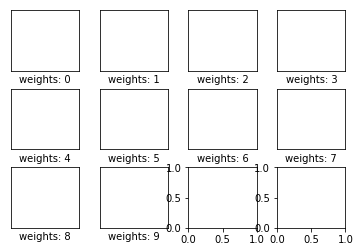

In [31]:
plot_weights()

In [32]:
optimize(num_iterations=999)

In [33]:
print_accuracy()

Acuracy on test-set: 92.3%


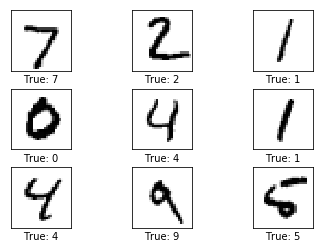

In [34]:
plot_images(image=images,cls_true=cls_true)

In [35]:
session.close()

In [37]:
data

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3415eedd68>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3415f1a320>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3415f1a2e8>)

In [38]:
type(data)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets